## 1. graph edit distance
#### (1) Calculate the graph edit distance between queries in a session

Use the command line to run 

```python graph_similarity/graph_edit_distance.py -mask 0 -begin 0 -end 2```

**input:** 
* mask: can be used to select the index of the data set to be run, see the py file above for details of what data is available
* begin, end: can be used to select the starting value of the session id to be run

Because this is slow to compute, only a portion of the data in the paper was selected for this step of the experiment. But we are not allowed to share the original data due to the privacy protection license. running this code locally requires a bit of re-specifying the directory of the dataset and the directory of the output.

**output:** outputs python pickle as a result in the folder specified by the code
Here's the result of the above command line run (only two sessions)

In [10]:
%load_ext autoreload
%autoreload 2
from file_utils.read_exported_data import read_pkl
from graph_similarity.graph_simi_analysis import GraphSimiChangeOverTime, plotSimiChangeOverTime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


GED of consecutive query pair ($q_i, q_{i+1}$) in two sessions

In [4]:
read_pkl('results/hypergraph/dbpedia.3.5.1.log_simi_conti.pkl')

[{'index': 0,
  'simi': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3076923076923077, 0.0, 0.0]},
 {'index': 1, 'simi': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}]

GED of ($q_1, q_{i+1}$) in both sessions

In [5]:
read_pkl('results/hypergraph/dbpedia.3.5.1.log_simi_first.pkl')

[{'index': 0,
  'simi': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.3076923076923077,
   0.3076923076923077,
   0.3076923076923077]},
 {'index': 1, 'simi': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}]

#### (2) The visualization of the GED is shown below, using the same data from the previous experimental run


In [6]:
def processGraphSimi(simi):
    res = []
    for simiForSess in simi:
        try:
            res.append(simiForSess['simi'])
        except:
            from ipdb import set_trace; set_trace()
    return res

In [17]:
def plotGED(name='conti'):
    data_source_left = ['ncbigene',
     'ndc',
     'orphanet',
     'sgd',
     'sider',
     'swdf',
     'goa',
     'linkedgeodata'
    ]
    simi_first = []
    for idx, i in enumerate(data_source_left):
        pkl = read_pkl(f'docs/hypergraph/{i}_simi_{name}.pkl')
        pkl = processGraphSimi(pkl)
        simi_first.append(pkl)
    ans = GraphSimiChangeOverTime(simi_first, data_source=data_source_left)
    plotSimiChangeOverTime(ans['all'][:35], f'figs/graph_similarity/all_{name}_10_hyper.pdf')

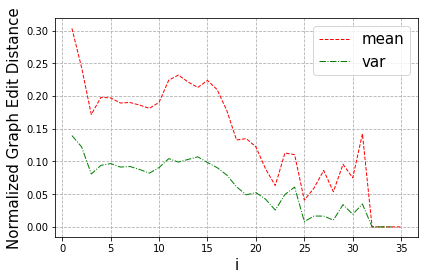

In [18]:
plotGED()

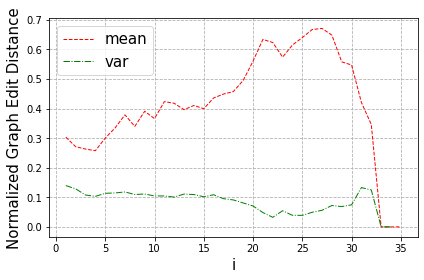

In [19]:
plotGED(name='first')

### 2. graph pattern similarity

(1) Similar to the GED experiment, first run it from the command line

```python vector/feature_vectors.py -m 0``''

The input is also similar to the GED experiment, where you need to specify the data directory and the output directory. The results of the experiment are stored in a python pickle file, which is read out as a dictionary: index_in_file <-> query feature vector

(2) The next step is to calculate the KL and cosine similarity of the vector corresponding to the query between sessions, using the session as the unit.
On the command line, type 

`python vector/vector_analysis.py -m 0`

(3) Visualisation

In [32]:
from vector.vector_analysis import proConfusionMat, matToMean
from vis_utils.drawer import draw_confusionMatrix

In [29]:
data_source = ['ncbigene','ndc','orphanet','sgd','sider','swdf','affymetrix','goa','linkedgeodata',
        'dbpedia.3.5.1.log','access.log-20151025', 'access.log-20151124','access.log-20151126',
        'access.log-20151213','access.log-20151230','access.log-20160117','access.log-20160212',
        'access.log-20160222','access.log-20160301','access.log-20160303','access.log-20160304',
        'access.log-20160314','access.log-20160411']

In [30]:
mat_kl, mat_cos, mat_kl_all, mat_cos_all = proConfusionMat(range(len(data_source)), dir_='hyper_featureVector', normalize=True)
mat_kl_mean = matToMean(mat_kl)
mat_cos_mean = matToMean(mat_cos)

mat_kl_mean_all = [matToMean(i) for i in mat_kl_all]
mat_cos_mean_all = [matToMean(i) for i in mat_cos_all]

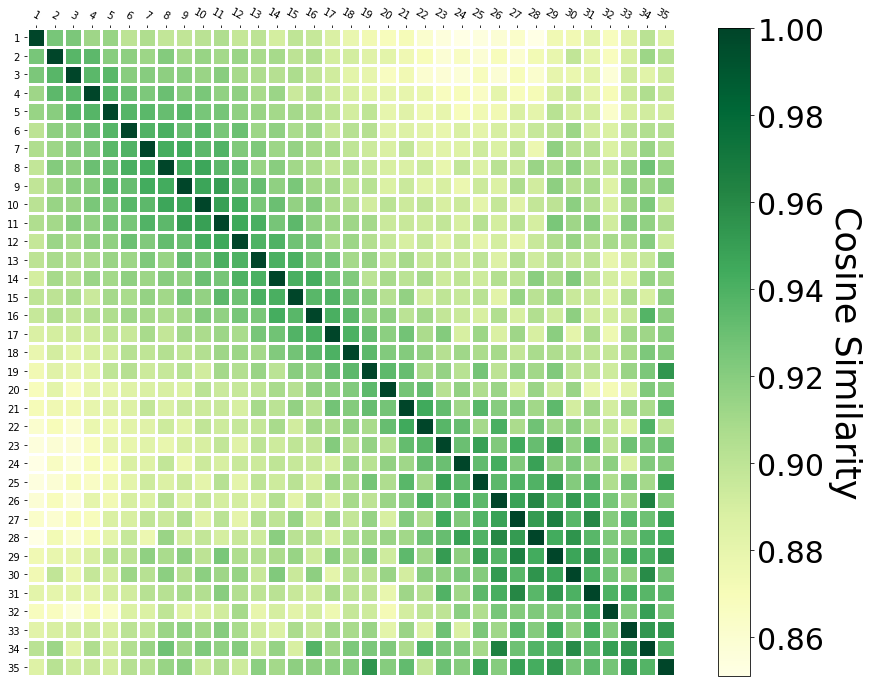

In [33]:
draw_confusionMatrix(mat_cos_mean[:35, :35], 'figs/feature_vector/cosine_10.pdf', 'Cosine Similarity', cmap="YlGn", figsize=(12.8, 9.6))

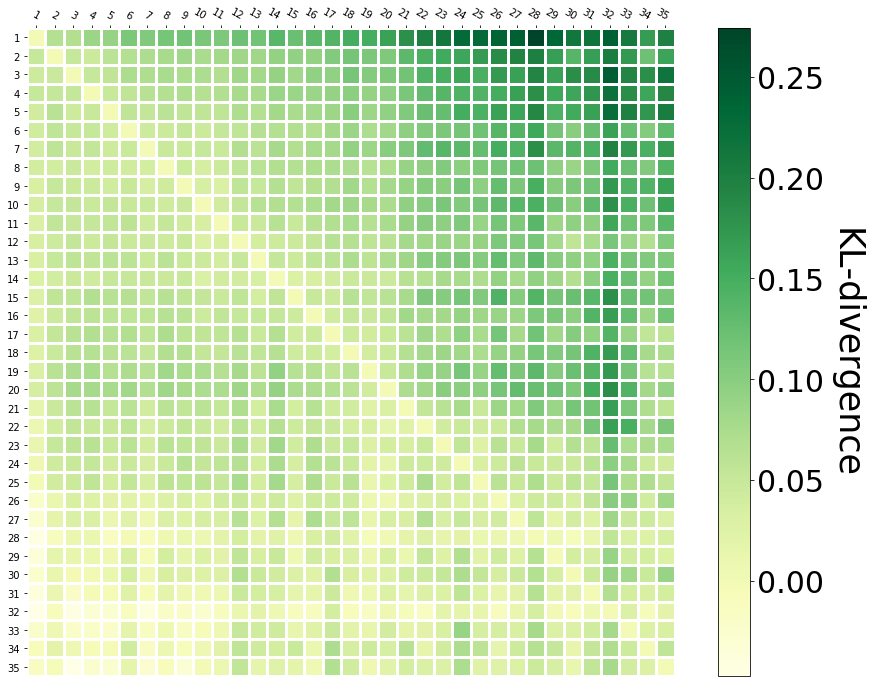

In [35]:
draw_confusionMatrix(mat_kl_mean[:35, :35], 'figs/feature_vector/kl_10.pdf', 'KL-divergence', cmap="YlGn", figsize=(12.8, 9.6))

### 3. IRI term similarity
The steps are similar to 2. Only the first step is different.

`python vector/IRI_vector.py -m 0`

The second step requires changing some variables.

`python vector/vector_analysis.py -m 0 --normalize True --sub_dir IRI_vector`

The IRI vector does not need to be normalized, and the output directory needs to be changed.

The third visualization step requires changing the dir_ in the proConfusionMat function (i.e. the directory where the data is stored) and changing the normalize parameter to False

In [60]:
mat_kl, mat_cos, mat_kl_all, mat_cos_all = proConfusionMat(range(len(data_source)), dir_='IRI_vector', normalize=False, root='results/')
mat_kl_mean = matToMean(mat_kl)
mat_cos_mean = matToMean(mat_cos)

mat_kl_mean_all = [matToMean(i) for i in mat_kl_all]
mat_cos_mean_all = [matToMean(i) for i in mat_cos_all]

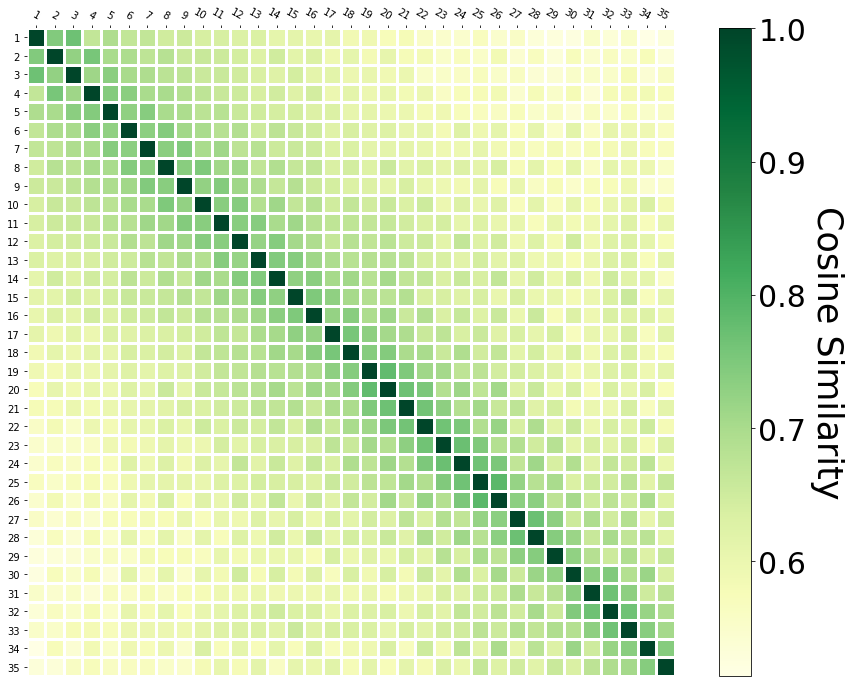

In [61]:
draw_confusionMatrix(mat_cos_mean[:35, :35], 'figs/IRI_vector/cosine_10.pdf', 'Cosine Similarity', cmap="YlGn", figsize=(12.8, 9.6))

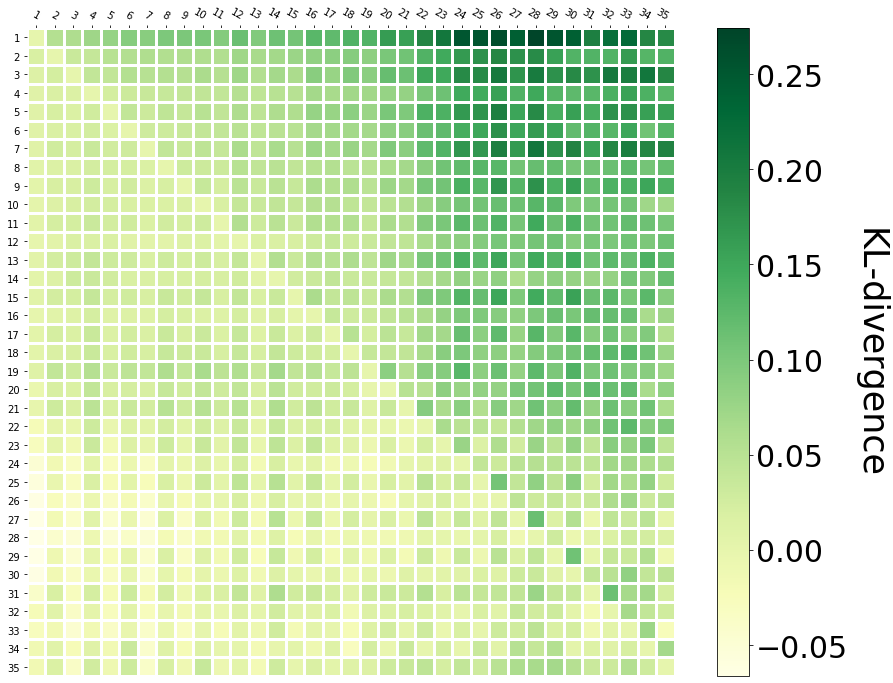

In [62]:
draw_confusionMatrix(mat_kl_mean[:35, :35], 'figs/IRI_vector/kl_10.pdf', 'KL-divergence', cmap="YlGn", figsize=(12.8, 9.6))

### 4. change of result size

In [50]:
from result_set.hiddenStateMatrix import hiddenState_matrix, hiddenState_matrix_fromZero
import numpy as np

This one counts from the first query

In [38]:
res, count = hiddenState_matrix(0)

100%|██████████| 23/23 [02:24<00:00,  6.29s/it]


In [39]:
res

{-1: 8344, 0: 15634, 1: 8281}

In [40]:
count

array([[1129., 2160., 3673.],
       [1160., 9546., 2110.],
       [4529., 1158., 1161.]])

This is a zero state in front of the 'result set change' sequence, equivalent to the start state, which is used in the paper

In [54]:
res, count = hiddenState_matrix_fromZero(0)

100%|██████████| 23/23 [03:12<00:00,  8.36s/it]


In [55]:
res

{-1: 9473, 0: 21605, 1: 15541}

In [56]:
count

array([[ 1129.,  2160.,  3673.],
       [ 1160., 12183.,  3291.],
       [ 7139.,  3327.,  2458.]])

In [57]:
perc = np.zeros((3,3))
perc[0, :] = count[0, :]/res[-1]
perc[1, :] = count[1, :]/res[0]
perc[2, :] = count[2, :]/res[1]

In [58]:
perc

array([[0.11918083, 0.22801647, 0.38773356],
       [0.05369128, 0.56389725, 0.15232585],
       [0.45936555, 0.21407889, 0.15816228]])

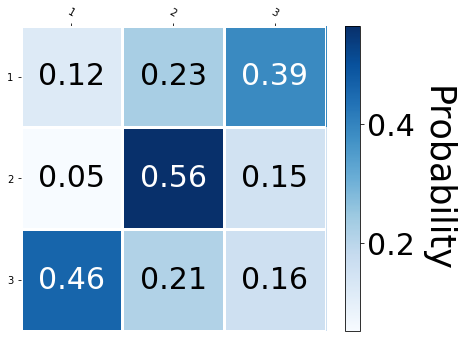

In [59]:
draw_confusionMatrix(perc, 'figs/result_size_change/transMatrix.png', 'Probability', annotate=True, cmap="Blues")